In [1]:
# import packages [RUN THIS]
import numpy as np
import pandas as pd
from bertopic import BERTopic
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import math
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

c:\Users\UPPL - 01\Downloads\Anaconda-coding\envs\bert-20\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# import dataset
df = pd.read_csv("../datasets/news_dataset_content_cleaned.csv")
df.head()

,outlet,article_text,nlp_label,nlp-image_label,content_sentence,content_words
0,CBC.ca,Tij Iginla doesn't shy away from his famous la...,Likely to be Bias,Likely to be Unbiased,tij iginla shy away famous last name instead e...,"['tij', 'iginla', 'shy', 'away', 'famous', 'la..."
1,CBC.ca,Tij Iginla doesn't shy away from his famous la...,Likely to be Bias,Likely to be Unbiased,mean thrilled go anywhere think would cool pla...,"['mean', 'thrilled', 'go', 'anywhere', 'think'..."
2,CBC.ca,Tij Iginla doesn't shy away from his famous la...,Likely to be Bias,Likely to be Unbiased,flame currently hold ninth pick iginla happens...,"['flame', 'currently', 'hold', 'ninth', 'pick'..."
3,CBC.ca,Tij Iginla doesn't shy away from his famous la...,Likely to be Bias,Likely to be Unbiased,max plante son former nhl player derek mirosla...,"['max', 'plante', 'son', 'former', 'nhl', 'pla..."
4,CBC.ca,This week on The Sunday Magazine with host Piy...,Likely to be Bias,Likely to be Unbiased,week sunday magazine host piya chattopadhyay s...,"['week', 'sunday', 'magazine', 'host', 'piya',..."


In [4]:
df.shape

(181747, 6)

In [2]:
# import dataset
df = pd.read_csv("../datasets/news_dataset_content_cleaned.csv")
df.head()

,outlet,article_text,nlp_label,nlp-image_label,content_sentence,content_words
0,CBC.ca,Tij Iginla doesn't shy away from his famous la...,Likely to be Bias,Likely to be Unbiased,tij iginla shy away famous last name instead e...,"['tij', 'iginla', 'shy', 'away', 'famous', 'la..."
1,CBC.ca,Tij Iginla doesn't shy away from his famous la...,Likely to be Bias,Likely to be Unbiased,mean thrilled go anywhere think would cool pla...,"['mean', 'thrilled', 'go', 'anywhere', 'think'..."
2,CBC.ca,Tij Iginla doesn't shy away from his famous la...,Likely to be Bias,Likely to be Unbiased,flame currently hold ninth pick iginla happens...,"['flame', 'currently', 'hold', 'ninth', 'pick'..."
3,CBC.ca,Tij Iginla doesn't shy away from his famous la...,Likely to be Bias,Likely to be Unbiased,max plante son former nhl player derek mirosla...,"['max', 'plante', 'son', 'former', 'nhl', 'pla..."
4,CBC.ca,This week on The Sunday Magazine with host Piy...,Likely to be Bias,Likely to be Unbiased,week sunday magazine host piya chattopadhyay s...,"['week', 'sunday', 'magazine', 'host', 'piya',..."


In [ ]:
# additional pre-processing
custom_stopwords = set([
    "could", "should", "would", "may", "might", "said", "year", "just", "many", "even", 
    "still", "back",  "day", "week", "month", "use", "give", "take", "since", "much", 
    "got", "whether", "look", "always", "let", "yet", "asked", "across", "cooky", "cookie",
    "cookies", "setting", "settings", "site", "sites", "website", "websites", "web", "page",
    "browser", "privacy", "advertisement", "advertisements", "ad", "ads", "clear", "real", 
    "associated", "th"])

# Uncomment this line when running the code for the first time after importing csv
df['content_words'] = df['content_words'].apply(eval)

df['content_words'] = df['content_words'].apply(lambda x: [word for word in x if word not in custom_stopwords])

df["content_sentence"] = df["content_words"].apply(lambda x: " ".join(x))

# drop all null values

df.head()

,outlet,article_text,nlp_label,nlp-image_label,content_sentence,content_words
0,CBC.ca,Tij Iginla doesn't shy away from his famous la...,Likely to be Bias,Likely to be Unbiased,tij iginla shy away famous last name instead e...,"[tij, iginla, shy, away, famous, last, name, i..."
1,CBC.ca,Tij Iginla doesn't shy away from his famous la...,Likely to be Bias,Likely to be Unbiased,mean thrilled go anywhere think cool play cana...,"[mean, thrilled, go, anywhere, think, cool, pl..."
2,CBC.ca,Tij Iginla doesn't shy away from his famous la...,Likely to be Bias,Likely to be Unbiased,flame currently hold ninth pick iginla happens...,"[flame, currently, hold, ninth, pick, iginla, ..."
3,CBC.ca,Tij Iginla doesn't shy away from his famous la...,Likely to be Bias,Likely to be Unbiased,max plante son former nhl player derek mirosla...,"[max, plante, son, former, nhl, player, derek,..."
4,CBC.ca,This week on The Sunday Magazine with host Piy...,Likely to be Bias,Likely to be Unbiased,sunday magazine host piya chattopadhyay sunday...,"[sunday, magazine, host, piya, chattopadhyay, ..."


In [5]:
len(df)

181747

In [22]:
df.dropna(inplace=True)
df.shape

(180651, 6)

In [24]:
df.reset_index(inplace = True,drop = True)
train_texts, test_texts = train_test_split(df['content_sentence'], test_size=0.2, random_state=42)

In [ ]:
# initialize BERTopic
topic_model_i = BERTopic(language="english", calculate_probabilities=True, nr_topics="auto", min_topic_size=50, top_n_words=5)

# fit BERTopic
topics, probs = topic_model_i.fit_transform(train_texts)

# Print the top topics
print(topic_model_i.get_topic_info())

    Topic  Count                                    Name  \
0      -1  68933            -1_biden_trump_president_one   
1       0  64738        0_trump_president_biden_election   
2       1   1406                 1_art_dress_best_museum   
3       2   1323      2_service_information_device_visit   
4       3   1311               3_gerus_safai_eskom_fared   
..    ...    ...                                     ...   
56     55     54  55_streaming_netflix_subscriber_disney   
57     56     52     56_relevant_capable_sharing_profile   
58     57     52         57_eurovision_contest_song_nemo   
59     58     52  58_dinosaur_fossil_bone_paleontologist   
60     59     51          59_ambani_wedding_anant_mukesh   

                                      Representation  \
0             [biden, trump, president, one, people]   
1           [trump, president, biden, election, new]   
2               [art, dress, best, museum, mattress]   
3     [service, information, device, visit, collect]   

In [17]:
topic_model_i.save("bertopic_model")

2025-04-05 19:55:06,630 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


In [12]:
print(topic_model_i.get_topic_info())

    Topic  Count                                    Name  \
0      -1  68933            -1_biden_trump_president_one   
1       0  64738        0_trump_president_biden_election   
2       1   1406                 1_art_dress_best_museum   
3       2   1323      2_service_information_device_visit   
4       3   1311               3_gerus_safai_eskom_fared   
..    ...    ...                                     ...   
56     55     54  55_streaming_netflix_subscriber_disney   
57     56     52     56_relevant_capable_sharing_profile   
58     57     52         57_eurovision_contest_song_nemo   
59     58     52  58_dinosaur_fossil_bone_paleontologist   
60     59     51          59_ambani_wedding_anant_mukesh   

                                      Representation  \
0             [biden, trump, president, one, people]   
1           [trump, president, biden, election, new]   
2               [art, dress, best, museum, mattress]   
3     [service, information, device, visit, collect]   

In [13]:
for topic_id, words in top_words.items():
    print(f"Topic {topic_id}: {', '.join(words[:5])}")

Topic -1: biden, trump, president, one, people
Topic 0: trump, president, biden, election, new
Topic 1: art, dress, best, museum, mattress
Topic 2: service, information, device, visit, collect
Topic 3: gerus, safai, eskom, fared, monster
Topic 4: article, think, story, updated, continues
Topic 5: module, automobile, consent, saved, developed
Topic 6: choice, service, affect, within, device
Topic 7: degree, college, student, program, education
Topic 8: skin, sunscreen, hair, product, spf
Topic 9: price, silver, ounce, gold, platinum
Topic 10: recall, product, recalled, food, listeria
Topic 11: pope, francis, church, vatican, catholic
Topic 12: review, provider, rating, hour, area
Topic 13: vacuum, grill, cleaner, robot, best
Topic 14: function, identifiable, set, switched, logging
Topic 15: lynch, yacht, bayesian, boat, sank
Topic 16: pest, spider, infestation, insect, control
Topic 17: content, see, capable, profile, sharing
Topic 18: nasa, space, astronaut, starliner, mission
Topic 19

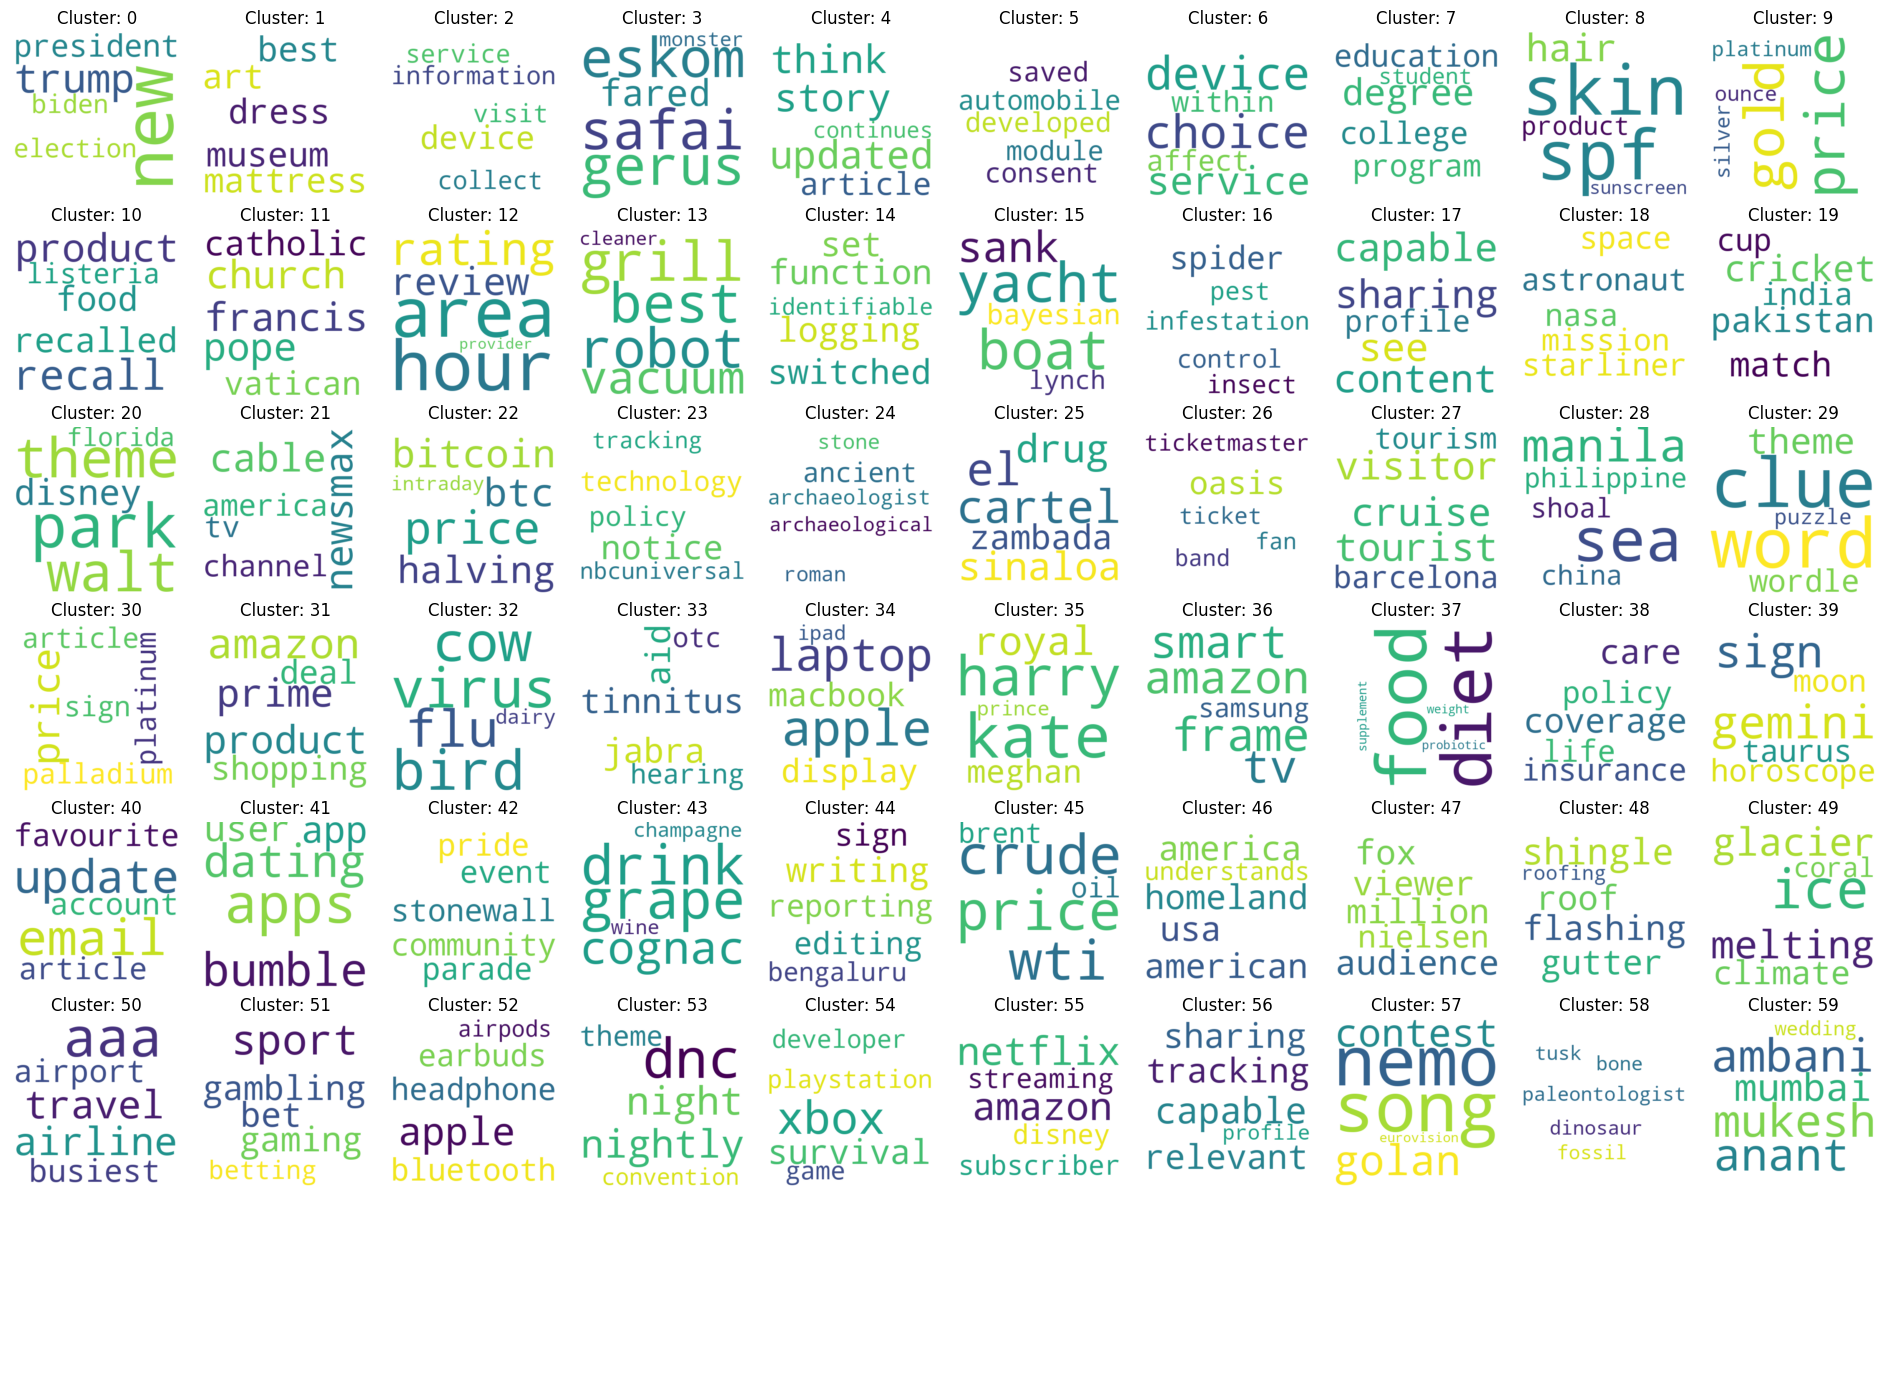

In [ ]:
# [RUN THIS]
top_n = 5
top_words = {}

topic_model_i = BERTopic.load("bertopic_model")
# Retrieve the topic-word mappings from the BERTopic model
topic_word_mappings = topic_model_i.get_topics()

for topic_id, topic_words in topic_word_mappings.items():
    # Get the top N words for each topic (sorted by importance)
    top_words[topic_id] = [word for word, _ in topic_words[:top_n]]

num_topics = len(top_words)
num_rows = math.ceil(num_topics / 10)  # 10 columns per row
num_cols = 10

# Create the subplots grid dynamically based on the number of topics
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(19, 14))
axes = axes.flatten()  # Flatten for easier indexing

num_clusters = len(top_words)
if num_clusters == 1:  # If only 1 cluster, make `axes` iterable
    axes = [axes]

for i, (cluster_label, words) in enumerate(top_words.items()):
    # # Create word frequency dictionary
    # if int(cluster_label) >= 0:
    if i > 0:
        word_freqs = {word: words.count(word) for word in set(words)}
        wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(word_freqs)
        axes[i-1].imshow(wordcloud, interpolation="bilinear")
        axes[i-1].axis('off')
        axes[i-1].set_title(f"Cluster: {cluster_label}", fontsize=12)

# Remove unused axes 
for j in range(i, len(axes)):
    axes[j].axis('off')
axes[0].axis('off')

plt.tight_layout()
plt.show()
 

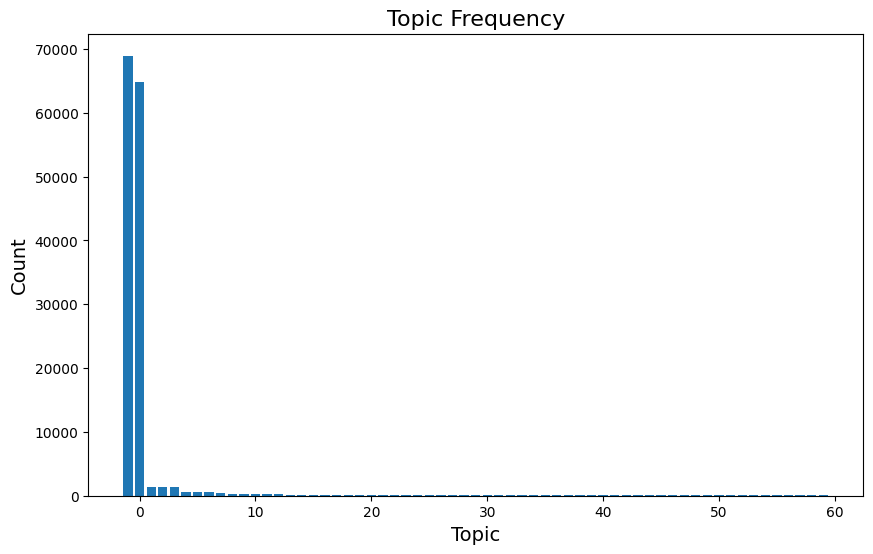

In [10]:
# [RUN THIS]
# topic_model = BERTopic.load("bertopic_model_content")

# Count the frequency of each topic
topics_df = topic_model_i.get_topic_info()
# plot a bar chart of the topic frequency
plt.figure(figsize=(10, 6)) 
plt.bar(topics_df["Topic"], topics_df["Count"])
plt.xlabel("Topic", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Topic Frequency", fontsize=16)
plt.show()



In [36]:
# fit the model on the test data
test_texts.reset_index(drop=True, inplace=True)
test_topics, _ = topic_model_i.transform(test_texts)


In [ ]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from nltk.tokenize import word_tokenize

train_texts.dropna(inplace=True)
tokenized_docs = train_texts.apply(lambda x: word_tokenize(x))  # Tokenize and lowercase

# Create a dictionary and corpus from the tokenized documents
dictionary = Dictionary(tokenized_docs)
corpus = [dictionary.doc2bow(text) for text in tokenized_docs]

# Extract top words per topic
topic_words = topic_model_i.get_topics()
top_words = [[word for word, _ in topic_words[topic]] for topic in topic_words]

# Coherence model
coherence_model = CoherenceModel(
    topics=top_words,
    texts=tokenized_docs,
    dictionary=dictionary,
    coherence='c_v'  # Or 'u_mass', etc.
)
coherence_score = coherence_model.get_coherence()

print(f"Coherence Score: {coherence_score}")


Coherence Score: 0.8076216514134498


In [40]:
# [RUN THIS]
# Get the reduced-dimensional embeddings from the BERTopic model
embeddings = topic_model_i.transform(test_texts)[1]

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(embeddings, test_topics)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.09516694278853045


In [5]:
df_orig = pd.read_csv("../datasets/news_dataset.csv")
df_orig['article_words'] = df_orig['article_text'].astype(str).str.lower().str.strip()
df_orig.head()

,unique_id,outlet,headline,url,article_text,image,nlp_label,nlp-image_label,article_words
0,39e6104d56,CBC.ca,"Tij Iginla embraces family name, eager to foll...",https://www.cbc.ca,Tij Iginla doesn't shy away from his famous la...,images/39e6104d56.jpeg,Likely to be Bias,Likely to be Unbiased,tij iginla doesn't shy away from his famous la...
1,89ce50166b,CBC.ca,"The Sunday Magazine for June 23, 2024 - CBC.ca",https://www.cbc.ca,This week on The Sunday Magazine with host Piy...,images/89ce50166b.jpeg,Likely to be Bias,Likely to be Unbiased,this week on the sunday magazine with host piy...
2,8b320e107e,CBC News,"Conservative MP shares inaccurate, ChatGPT-gen...",https://www.cbc.ca,An Ontario Conservative MP's use of ChatGPT to...,images/8b320e107e.jpeg,Likely to be Bias,Likely to be Bias,an ontario conservative mp's use of chatgpt to...
3,7536f87654,CBC.ca,"Women's sports are more popular than ever, but...",https://www.cbc.ca,"When it comes to the study of sports, a man's ...",images/7536f87654.jpeg,Likely to be Unbiased,Likely to be Unbiased,"when it comes to the study of sports, a man's ..."
4,c829d1f9a8,CBC.ca,June 22: Listener Question Show - CBC.ca,https://www.cbc.ca,"To wrap up the 48th season of Quirks & Quarks,...",images/c829d1f9a8.jpeg,Likely to be Bias,Likely to be Unbiased,"to wrap up the 48th season of quirks & quarks,..."


In [7]:
# [RUN THIS]
# df_topics = df.copy()
df_topics = df_orig.copy()
topic_model_i = BERTopic.load("bertopic_model_content")
topics, probs = topic_model_i.transform(df_orig['article_words'])
# df_topics["topics"] = topics
df_topics["probabilities"] = probs.tolist()
# df_topics.drop(columns=["topic_2", "topic_3"], inplace=True)
df_topics.head()

,unique_id,outlet,headline,url,article_text,image,nlp_label,nlp-image_label,article_words,probabilities
0,39e6104d56,CBC.ca,"Tij Iginla embraces family name, eager to foll...",https://www.cbc.ca,Tij Iginla doesn't shy away from his famous la...,images/39e6104d56.jpeg,Likely to be Bias,Likely to be Unbiased,tij iginla doesn't shy away from his famous la...,"[0.2948734528399991, 0.0020992468304943755, 0...."
1,89ce50166b,CBC.ca,"The Sunday Magazine for June 23, 2024 - CBC.ca",https://www.cbc.ca,This week on The Sunday Magazine with host Piy...,images/89ce50166b.jpeg,Likely to be Bias,Likely to be Unbiased,this week on the sunday magazine with host piy...,"[0.2736329602644918, 1.1757820478080154e-16, 1..."
2,8b320e107e,CBC News,"Conservative MP shares inaccurate, ChatGPT-gen...",https://www.cbc.ca,An Ontario Conservative MP's use of ChatGPT to...,images/8b320e107e.jpeg,Likely to be Bias,Likely to be Bias,an ontario conservative mp's use of chatgpt to...,"[0.908943244012, 5.425177342246717e-09, 7.7409..."
3,7536f87654,CBC.ca,"Women's sports are more popular than ever, but...",https://www.cbc.ca,"When it comes to the study of sports, a man's ...",images/7536f87654.jpeg,Likely to be Unbiased,Likely to be Unbiased,"when it comes to the study of sports, a man's ...","[0.3225695624023241, 0.01089111248649966, 0.00..."
4,c829d1f9a8,CBC.ca,June 22: Listener Question Show - CBC.ca,https://www.cbc.ca,"To wrap up the 48th season of Quirks & Quarks,...",images/c829d1f9a8.jpeg,Likely to be Bias,Likely to be Unbiased,"to wrap up the 48th season of quirks & quarks,...","[0.06793549009754152, 1.3375698072996505e-08, ..."


In [8]:
prob_df = pd.DataFrame(probs, columns=[f"topic_{i}" for i in range(probs.shape[1])])
df_corr = pd.concat([df_topics, prob_df], axis=1)
df_corr.head()

,unique_id,outlet,headline,url,article_text,image,nlp_label,nlp-image_label,article_words,probabilities,...,topic_50,topic_51,topic_52,topic_53,topic_54,topic_55,topic_56,topic_57,topic_58,topic_59
0,39e6104d56,CBC.ca,"Tij Iginla embraces family name, eager to foll...",https://www.cbc.ca,Tij Iginla doesn't shy away from his famous la...,images/39e6104d56.jpeg,Likely to be Bias,Likely to be Unbiased,tij iginla doesn't shy away from his famous la...,"[0.2948734528399991, 0.0020992468304943755, 0....",...,2.204715e-04,8.264532e-04,2.382990e-04,1.306584e-04,2.671088e-04,2.279334e-04,1.099931e-04,4.444077e-04,2.460181e-04,1.923344e-04
1,89ce50166b,CBC.ca,"The Sunday Magazine for June 23, 2024 - CBC.ca",https://www.cbc.ca,This week on The Sunday Magazine with host Piy...,images/89ce50166b.jpeg,Likely to be Bias,Likely to be Unbiased,this week on the sunday magazine with host piy...,"[0.2736329602644918, 1.1757820478080154e-16, 1...",...,8.193694e-18,4.739075e-18,1.331978e-17,1.903198e-18,1.543658e-17,1.469966e-17,1.678444e-18,5.606029e-18,1.526843e-17,5.520261e-18
2,8b320e107e,CBC News,"Conservative MP shares inaccurate, ChatGPT-gen...",https://www.cbc.ca,An Ontario Conservative MP's use of ChatGPT to...,images/8b320e107e.jpeg,Likely to be Bias,Likely to be Bias,an ontario conservative mp's use of chatgpt to...,"[0.908943244012, 5.425177342246717e-09, 7.7409...",...,4.310932e-10,2.253340e-10,6.538742e-10,1.157233e-10,7.449804e-10,7.984085e-10,1.111723e-10,2.321547e-10,5.907736e-10,3.716267e-10
3,7536f87654,CBC.ca,"Women's sports are more popular than ever, but...",https://www.cbc.ca,"When it comes to the study of sports, a man's ...",images/7536f87654.jpeg,Likely to be Unbiased,Likely to be Unbiased,"when it comes to the study of sports, a man's ...","[0.3225695624023241, 0.01089111248649966, 0.00...",...,1.124940e-03,2.478617e-03,1.192994e-03,6.370211e-04,1.346691e-03,1.132986e-03,5.501321e-04,2.782077e-03,1.312329e-03,9.740477e-04
4,c829d1f9a8,CBC.ca,June 22: Listener Question Show - CBC.ca,https://www.cbc.ca,"To wrap up the 48th season of Quirks & Quarks,...",images/c829d1f9a8.jpeg,Likely to be Bias,Likely to be Unbiased,"to wrap up the 48th season of quirks & quarks,...","[0.06793549009754152, 1.3375698072996505e-08, ...",...,1.938115e-09,2.120800e-12,1.497678e-09,2.094535e-13,1.404683e-09,1.434112e-09,1.942999e-13,2.168865e-12,2.764668e-09,4.458107e-12


In [11]:
# get dominant topic
# Ensure only numeric columns are used for idxmax
# df_corr.drop(columns=["topic_2", "topic_3"], inplace=True)
numeric_columns = [col for col in df_corr.columns if col.startswith("topic_")]
df_corr["dominant_topic"] = df_corr[numeric_columns].idxmax(axis=1).str.replace("topic_", "", regex=False)

df_corr.head()

,unique_id,outlet,headline,url,article_text,image,nlp_label,nlp-image_label,article_words,probabilities,...,topic_52,topic_53,topic_54,topic_55,topic_56,topic_57,topic_58,topic_59,dominant_topic_bertopic,dominant_topic
0,39e6104d56,CBC.ca,"Tij Iginla embraces family name, eager to foll...",https://www.cbc.ca,Tij Iginla doesn't shy away from his famous la...,images/39e6104d56.jpeg,Likely to be Bias,Likely to be Unbiased,tij iginla doesn't shy away from his famous la...,"[0.2948734528399991, 0.0020992468304943755, 0....",...,2.382990e-04,1.306584e-04,2.671088e-04,2.279334e-04,1.099931e-04,4.444077e-04,2.460181e-04,1.923344e-04,0,0
1,89ce50166b,CBC.ca,"The Sunday Magazine for June 23, 2024 - CBC.ca",https://www.cbc.ca,This week on The Sunday Magazine with host Piy...,images/89ce50166b.jpeg,Likely to be Bias,Likely to be Unbiased,this week on the sunday magazine with host piy...,"[0.2736329602644918, 1.1757820478080154e-16, 1...",...,1.331978e-17,1.903198e-18,1.543658e-17,1.469966e-17,1.678444e-18,5.606029e-18,1.526843e-17,5.520261e-18,0,0
2,8b320e107e,CBC News,"Conservative MP shares inaccurate, ChatGPT-gen...",https://www.cbc.ca,An Ontario Conservative MP's use of ChatGPT to...,images/8b320e107e.jpeg,Likely to be Bias,Likely to be Bias,an ontario conservative mp's use of chatgpt to...,"[0.908943244012, 5.425177342246717e-09, 7.7409...",...,6.538742e-10,1.157233e-10,7.449804e-10,7.984085e-10,1.111723e-10,2.321547e-10,5.907736e-10,3.716267e-10,0,0
3,7536f87654,CBC.ca,"Women's sports are more popular than ever, but...",https://www.cbc.ca,"When it comes to the study of sports, a man's ...",images/7536f87654.jpeg,Likely to be Unbiased,Likely to be Unbiased,"when it comes to the study of sports, a man's ...","[0.3225695624023241, 0.01089111248649966, 0.00...",...,1.192994e-03,6.370211e-04,1.346691e-03,1.132986e-03,5.501321e-04,2.782077e-03,1.312329e-03,9.740477e-04,0,0
4,c829d1f9a8,CBC.ca,June 22: Listener Question Show - CBC.ca,https://www.cbc.ca,"To wrap up the 48th season of Quirks & Quarks,...",images/c829d1f9a8.jpeg,Likely to be Bias,Likely to be Unbiased,"to wrap up the 48th season of quirks & quarks,...","[0.06793549009754152, 1.3375698072996505e-08, ...",...,1.497678e-09,2.094535e-13,1.404683e-09,1.434112e-09,1.942999e-13,2.168865e-12,2.764668e-09,4.458107e-12,0,0


In [12]:
df_corr["dominant_topic"].value_counts()

dominant_topic
0     37643
1       589
6       501
27      152
41      140
29      137
42      126
10      109
2       102
8        85
38       84
35       84
22       67
4        64
20       58
19       56
54       51
7        50
45       46
31       44
52       43
13       39
37       35
34       34
15       33
32       32
24       32
43       32
16       31
9        31
25       31
58       31
18       30
36       30
11       29
26       28
28       27
49       22
33       21
55       20
39       19
59       18
50       17
57       16
40       15
51       12
48       12
47       11
5        10
12        9
23        2
21        1
14        1
56        1
53        1
30        1
Name: count, dtype: int64

In [14]:
final_df = df_corr[['unique_id', 'outlet', 'headline', 'url', 'article_text', 'image', 'nlp_label', 'nlp-image_label', 'dominant_topic']]
final_df.head()

,unique_id,outlet,headline,url,article_text,image,nlp_label,nlp-image_label,dominant_topic
0,39e6104d56,CBC.ca,"Tij Iginla embraces family name, eager to foll...",https://www.cbc.ca,Tij Iginla doesn't shy away from his famous la...,images/39e6104d56.jpeg,Likely to be Bias,Likely to be Unbiased,0
1,89ce50166b,CBC.ca,"The Sunday Magazine for June 23, 2024 - CBC.ca",https://www.cbc.ca,This week on The Sunday Magazine with host Piy...,images/89ce50166b.jpeg,Likely to be Bias,Likely to be Unbiased,0
2,8b320e107e,CBC News,"Conservative MP shares inaccurate, ChatGPT-gen...",https://www.cbc.ca,An Ontario Conservative MP's use of ChatGPT to...,images/8b320e107e.jpeg,Likely to be Bias,Likely to be Bias,0
3,7536f87654,CBC.ca,"Women's sports are more popular than ever, but...",https://www.cbc.ca,"When it comes to the study of sports, a man's ...",images/7536f87654.jpeg,Likely to be Unbiased,Likely to be Unbiased,0
4,c829d1f9a8,CBC.ca,June 22: Listener Question Show - CBC.ca,https://www.cbc.ca,"To wrap up the 48th season of Quirks & Quarks,...",images/c829d1f9a8.jpeg,Likely to be Bias,Likely to be Unbiased,0


In [2]:
import pandas as pd
final_df = pd.read_csv("../datasets/articles_with_dominant_topic.csv")
topics = {
    0: "US Presidential Politics & Election",
    1: "Art & Fashion Highlights",
    2: "Tech Services & Data Collection",
    3: "South African News & Utilities",
    4: "Storytelling & Article Updates",
    5: "Automobile Consent Modules",
    6: "Device Choices & User Preferences",
    7: "Higher Education & Degrees",
    8: "Skincare & Personal Products",
    9: "Precious Metals Pricing",
    10: "Product Recalls & Food Safety",
    11: "Catholic Church & The Pope",
    12: "Service Reviews & Ratings",
    13: "Home Appliances & Gadgets",
    14: "Functional Settings & Logging",
    15: "Yacht & Bayesian Mishaps",
    16: "Pest Control & Insects",
    17: "Content Sharing & Profiles",
    18: "NASA & Space Missions",
    19: "Cricket World Cup",
    20: "Disney Theme Parks",
    21: "Newsmax & Cable News",
    22: "Bitcoin & Crypto Market",
    23: "Tech Policies & Tracking",
    24: "Ancient Rome & Archaeology",
    25: "Drug Cartels & Zambada",
    26: "Concerts & Ticketing",
    27: "Tourism & Barcelona Cruises",
    28: "Philippines-China Maritime Tensions",
    29: "Word Games & Puzzles",
    30: "Platinum & Metals Market",
    31: "Amazon Deals & Shopping",
    32: "Bird Flu & Animal Viruses",
    33: "Hearing Aids & Health Devices",
    34: "Apple Laptops & Displays",
    35: "British Royal Family",
    36: "Smart TVs & Streaming Devices",
    37: "Diet & Nutritional Supplements",
    38: "Insurance & Health Coverage",
    39: "Horoscopes & Astrology",
    40: "Article Access & Updates",
    41: "Dating Apps & Users",
    42: "Pride Parades & LGBTQ+ Events",
    43: "Wines & Alcoholic Drinks",
    44: "Editing & Journalism",
    45: "Oil Prices & Crude Markets",
    46: "American Identity & Patriotism",
    47: "TV Ratings & Viewership",
    48: "Roofing & Home Repairs",
    49: "Climate Change & Glaciers",
    50: "Travel & Airports",
    51: "Sports Betting & Gambling",
    52: "Apple AirPods & Audio Tech",
    53: "DNC & Convention Themes",
    54: "Gaming & Console Platforms",
    55: "Streaming Services & Subscriptions",
    56: "User Tracking & Sharing Preferences",
    57: "Eurovision Song Contest",
    58: "Dinosaurs & Fossils",
    59: "Ambani Wedding & Indian Celebrities"
}

final_df["dominant_topic_name"] = final_df["dominant_topic"].astype(int).map(topics)
final_df.head()

,unique_id,outlet,headline,url,article_text,image,nlp_label,nlp-image_label,dominant_topic,dominant_topic_name
0,39e6104d56,CBC.ca,"Tij Iginla embraces family name, eager to foll...",https://www.cbc.ca,Tij Iginla doesn't shy away from his famous la...,images/39e6104d56.jpeg,Likely to be Bias,Likely to be Unbiased,0,US Presidential Politics & Election
1,89ce50166b,CBC.ca,"The Sunday Magazine for June 23, 2024 - CBC.ca",https://www.cbc.ca,This week on The Sunday Magazine with host Piy...,images/89ce50166b.jpeg,Likely to be Bias,Likely to be Unbiased,0,US Presidential Politics & Election
2,8b320e107e,CBC News,"Conservative MP shares inaccurate, ChatGPT-gen...",https://www.cbc.ca,An Ontario Conservative MP's use of ChatGPT to...,images/8b320e107e.jpeg,Likely to be Bias,Likely to be Bias,0,US Presidential Politics & Election
3,7536f87654,CBC.ca,"Women's sports are more popular than ever, but...",https://www.cbc.ca,"When it comes to the study of sports, a man's ...",images/7536f87654.jpeg,Likely to be Unbiased,Likely to be Unbiased,0,US Presidential Politics & Election
4,c829d1f9a8,CBC.ca,June 22: Listener Question Show - CBC.ca,https://www.cbc.ca,"To wrap up the 48th season of Quirks & Quarks,...",images/c829d1f9a8.jpeg,Likely to be Bias,Likely to be Unbiased,0,US Presidential Politics & Election


In [3]:
final_df.to_csv("../datasets/articles_with_dominant_topic.csv", index=False)